In [1]:
# source dir
data_dir = "../../data/benchmarking-jmh/ijrun_ijapi/*" 

# activating autoreload
%load_ext autoreload
%autoreload 2

# adding the project directory to the path
import sys

#sys.path


In [2]:
# creating a cumulative dataframe from all the files
from script import create_master_dataframe

mdf = create_master_dataframe(data_dir)
# mdf

In [3]:
# make new columns with information about which operation/implementation/on which computer
def label_operations (row):
    benchmark = row['Benchmark'].split('.')
    operation = benchmark[-2]
    return operation

def label_implementations (row):
    benchmark = row['Benchmark'].split('.')
    implementation = benchmark[-1]
    return implementation
    
def label_computers (row):
    filename = row['Filename'].split('_')
    computer = filename[-2]
    return computer

mdf['operation'] = mdf.apply (lambda row: label_operations(row), axis=1)
mdf['implementation'] = mdf.apply (lambda row: label_implementations(row), axis=1)
mdf['computer'] = mdf.apply (lambda row: label_computers(row), axis=1)
# mdf

In [4]:
# split into two tables: ijrun versus ijapi
df_ijrun = mdf[mdf.implementation == 'ijrun']
df_ijapi = mdf[mdf.implementation == 'ijapi']

# df_ijrun
# df_ijapi


In [5]:
# reunite the tables using INNER JOIN
import pandas as pd

combined_df = pd.merge(df_ijrun, df_ijapi, left_on='operation', right_on='operation', how='inner')

# combined_df

In [6]:
# read out average execution times and errors
score_ijrun = combined_df['Score_x']
score_ijapi = combined_df['Score_y']

error_ijrun = combined_df['Score Error (99.9%)_x']
error_ijapi = combined_df['Score Error (99.9%)_y']


# convert to seconds
correction_factor = 1e-9

score_ijapi = score_ijapi * correction_factor
score_ijrun = score_ijrun * correction_factor
error_ijrun = error_ijrun * correction_factor
error_ijapi = error_ijapi * correction_factor

operations = combined_df['operation']
operations 

0            AddScalar2D
1            AddScalar3D
2        AutoThreshold2D
3                Erode2D
4       FixedThreshold2D
5                 Flip2D
6         GaussianBlur2D
7         GaussianBlur3D
8     MaximumZProjection
9                 Mean2D
10                Mean3D
11             Minimum3D
12      MultiplyScalar2D
13      MultiplyScalar3D
Name: operation, dtype: object

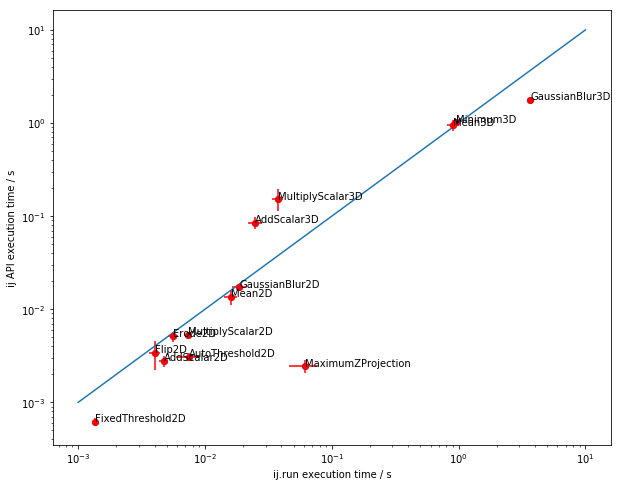

In [7]:
# plot
import numpy as np
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(score_ijrun, score_ijapi)

for i, txt in enumerate(operations):
    ax.annotate(txt, (score_ijrun[i], score_ijapi[i]))

#fig = plt.figure()


plt.errorbar(score_ijrun, score_ijapi, xerr=error_ijrun ,yerr=error_ijapi, fmt='ro')

# plt.legend(loc='lower right')

plt.plot([pow(10, -3), pow(10, 1)], [pow(10, -3), pow(10, 1)])

ax.set_xscale('log')
ax.set_yscale('log')

plt.xlabel("ij.run execution time / s");
plt.ylabel("ij API execution time / s");

plt.show()